<a href="https://colab.research.google.com/github/qtuter1997/MachineLearning/blob/main/SupervisedLearning/LogisticRegression/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex1

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/MachineLearning/MachineLearning/Data/coursera-ml

/content/drive/MyDrive/Colab Notebooks/MachineLearning/MachineLearning/Data/coursera-ml


In [ ]:
!ls

ex1data1.csv  ex1-multi.ipynb  ex2data2.csv  ex2-reg.ipynb
ex1data2.csv  ex1.pdf	       ex2.ipynb     ex7.pdf
ex1.ipynb     ex2data1.csv     ex2.pdf


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
DATA = './ex2data1.csv'
ITERATIONS = 200000
LR = 0.001

In [ ]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

def compute_cost(X,y,theta):
  m = y.size
  h = sigmoid(np.dot(X,theta))
  J = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m
  return J

def gradient_descent(X, y, theta, Lr, num_inters):
  m = y.size
  jHistory = np.empty(num_inters)
  for i in range(num_inters):
    delta = np.dot(X.T, sigmoid(np.dot(X, theta)) - y) / m
    theta -= Lr * delta
    jHistory[i] = compute_cost(X, y, theta)
  return theta, jHistory

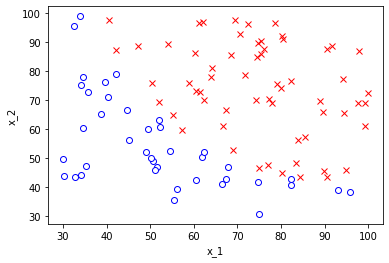

In [ ]:
df = pd.read_csv(DATA)
df_0 = df[df.y == 0]
df_1 = df[df.y == 1]
# plot data

df_0.plot(x='x_1', y='x_2', legend=False, marker='o', style='o', mec='b', mfc='w')
plt.plot(df_1.x_1, df_1.x_2, marker='x', linestyle='None', mec='r', mfc='w')
plt.xlabel('x_1'); plt.ylabel('x_2'); plt.show()

# extract X,y
X = df.values[:, 0:2]
y = df.values[:,2]
m = y.size # number of training examples
# add X_0 to X
X = np.concatenate((np.ones((m,1)), X.reshape(-1,2)), axis=1)

[-7.45017822  0.06550395  0.05898701]


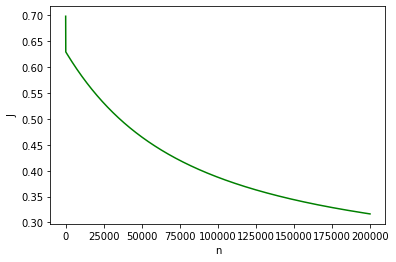

In [ ]:
theta, jHistory = gradient_descent(X, y, np.zeros(X.shape[1]), LR, INTERATIONS)
print(theta)
# plot J
plt.plot(range(jHistory.size), jHistory, color='g')
plt.xlabel('n'); plt.ylabel('J'); plt.show()

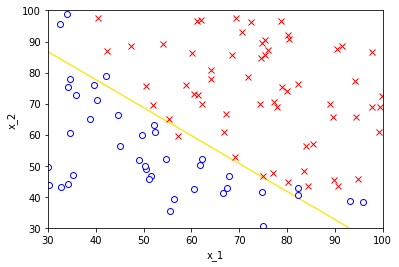

In [ ]:
df_0.plot(x='x_1', y='x_2', legend=False, marker='o', style='o', mec='b', mfc='w')
plt.plot(df_1.x_1, df_1.x_2, marker='x', linestyle='None', mec='r', mfc='w')

# decision line
x = np.linspace(30.0, 100.0, num=100)
y = np.empty((100, 100))
for i in range(100):
    for j in range(100):
        y[i][j] = sigmoid(np.dot(np.array([1.0, x[i], x[j]]).T, theta))
plt.contour(x, x, y, levels=[0.0, 0.5])

# predict for 3.5 and 7.0
plt.xlabel('x_1'); plt.ylabel('x_2'); plt.show()

Ex2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score